# Importa librerías importantes

In [ ]:
# Librerías estándar
import numpy  as np
import pandas as pd

import itertools
import random
import datetime
import operator

# Gráficas
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline  
import seaborn as sns
sns.set(style="white")

# scikit-learn
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Lasso
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.metrics         import mean_squared_error
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split


# Ignorar warnings 
import warnings
warnings.filterwarnings('ignore')

# Para poder replicar los resultados de problemas aleatorios, es necesario definir una semilla
SEED = 1

# Importar datos

In [ ]:
# Importar datos
data = pd.read_csv(r'data/movies.csv')

In [57]:
# Echa un vistazo a los datos
data.head()

,movie_name,Filmaffinity_score,IMBD_score
0,Bidrman,7.2,7.9
1,Boyhood,7.4,8.1
2,El gran Hotel Budapest,7.2,8.1
3,El Francotirador,6.3,7.4
4,La Teoría del Todo,7.1,7.8


# Explorar los datos brevemente

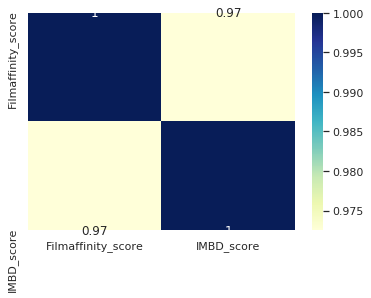

In [58]:
# Gráficar mapa de calor para visualizar la matriz de correlación entre las variables IMBD_score y Filmaffinity_score
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Define variable target y set de datos con variables independientes

In [60]:
# Define la variable target (Score de IMBD)
y = np.array(data['IMBD_score'])

# Define el conjunto de variable independiente
X = data.drop(columns=['IMBD_score', 'movie_name'])

# Obtén los parámetros W óptimos usando el método de LinearRegression() de la librería Sklearn

In [ ]:
# Entrena una regresión lineal para predecir el score de IMBD con base en el de Filmaffinity_score
modelo_LinReg = LinearRegression()
modelo_LinReg.fit(X, y)

In [ ]:
# Revisa los parámetros W óptimos

w0 = modelo_LinReg.intercept_
w1 = float(modelo_LinReg.coef_)

print("W0 = {0:.4f}".format(w0))
print("W1 = {0:.4f}".format(w1))

In [ ]:
# Calcula y_pred
y_pred = np.array(X*w1+w0)

In [ ]:
# Calcula el MSE
mean_squared_error(y,y_pred)

In [ ]:
# Revisa el score R^2
modelo_LinReg.score(X,y)

In [ ]:
# Gráfica los resultados
plt.scatter(X, y, s=10)
plt.plot(X, w0 + X*w1, color='red')
plt.show()

# Ahora hazlo con la fórmula de mínimos cuadrados
$\textbf{W} = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^Ty$

In [ ]:
# Agrega el valor para el intercepto en la matrix X
X_b = np.c_[np.ones((X.shape[0],1)), X]
X_b

In [ ]:
# Determina los valores para w0 y w1
W = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
# Revisa los parámetros W óptimos
print("W0 = {0:.4f}".format(W[0]))
print("W1 = {0:.4f}".format(W[1]))

In [ ]:
# Revisa el error cuadrático medio
e = y - X_b.dot(W.T)
e_2 = e**2
MSE = np.mean(e_2)
MSE

In [ ]:
# Gráfica los resultados
plt.scatter(X, y, s=10)
plt.plot(X, W[0] + X*W[1], color='red')
plt.show()

# Ahora hazlo con gradiente descendiente
## Pasos para llevar a cabo el algoritmo gradiente descendente
Itera las veces que sean necesarias
1. Calcula el valor de la función de costo para el vector w inicial
2. Calcula el valor del gradiente de la función de costo en ese valor w
3. Da un paso de tamaño $\gamma$ en dirección contraria al gradiente de la función de costo, i.e. $\textbf{w}^{(t+1)} = \textbf{w}^{(t)}-\gamma \nabla\mathcal{L}(\textbf{w}^{(t)})$
4. Guarda el valor de los parámetros ws y de los valores de la función de costo en cada iteración
5. Imprime resultados de cada iteración para que veas como va la ejecución del algoritmo 

In [61]:
def calcula_costo_mse(y, X, w):
    """ 
    Función para calcular el valor de la función de costo/pérdida
    
    Args:
        y     arreglo de numpy que contiene variable target
        X     matriz que contiene variables independientes
        w     arreglo de numpy que contiene parámetros w
    """
    e = y - X.dot(w)
    mse = np.mean(e**2)
    return mse

def calcula_gradiente(y, X, w):
    """ 
    Función para calcular el valor del gradiente
    
    Args:
        y     arreglo de numpy que contiene variable target
        X     matriz que contiene variables independientes
        w     arreglo de numpy que contiene parámetros w
    """
    e = y - X.dot(w)
    gradiente = -X.T.dot(e) / len(e)
    return gradiente

def gradiente_descendente(y, X, w_inicial, max_iters, gamma):
    """ 
    Función para llevar a cabo el algoritmo de optimización llamado gradiente descendente
    
    Args:
        y             arreglo de numpy que contiene variable target
        X             matriz que contiene variables independientes
        w_inicial     arreglo de numpy que contiene parámetros w iniciales
        max_iters     número de iteraciones máximas para ejecutar el algoritmo
        gamma         parámetro de aprendizaje
    """
    # Define variables para guardar w y el valor de la función de costo
    ws = [w_inicial]
    costos = []
    w = w_inicial
    for n_iter in range(max_iters):
        # Calcula el valor de la función de costo y del gradiente
        costo = calcula_costo_mse(y, X, w)
        gradiente = calcula_gradiente(y, X, w)
        # Actualiza el valor de w
        w = w - gamma * gradiente
        # Almacena el valor de w y de la función de costo
        ws.append(w)
        costos.append(costo)
        if (n_iter % 1000==0):
            print("Gradiente Descendente({bi}/{ti}): valor función de costo={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=costo, w0=w[0], w1=w[1]))

    return costos, ws

# Definir parámetros para iniciar con el algoritmo
max_iters = 10000
gamma = 0.02

# Inicializar el vector de parámetros w
w_inicial = np.array([0,0])

# Iniciar algoritmo de gradiente descendente
inicio = datetime.datetime.now()
costo_gradiente, ws_gradiente = gradiente_descendente(y, X_b, w_inicial, max_iters, gamma)
final = datetime.datetime.now()

# Imprimir proceso de ejecución
tiempo_ejecucion = (inicio - final).total_seconds()
print("Gradiente Descendente: tiempo de ejecución={t:.3f} segundos".format(t=tiempo_ejecucion))

Gradiente Descendente(0/9999): valor función de costo=62.99285714285713, w0=0.15857142857142859, w1=1.1314285714285715
Gradiente Descendente(1000/9999): valor función de costo=0.0292883409763395, w0=0.3542379704508628, w1=1.0633104564241975
Gradiente Descendente(2000/9999): valor función de costo=0.025804164103574414, w0=0.5390276885101818, w1=1.0374468640544348
Gradiente Descendente(3000/9999): valor función de costo=0.02286685541025562, w0=0.7086966889541105, w1=1.0136996019699815
Gradiente Descendente(4000/9999): valor función de costo=0.020390579757521683, w0=0.8644822489623856, w1=0.9918954980216447
Gradiente Descendente(5000/9999): valor función de costo=0.018302974487339998, w0=1.0075204035079597, w1=0.9718755501514807
Gradiente Descendente(6000/9999): valor función de costo=0.016543034813710177, w0=1.1388542296643538, w1=0.9534937669021559
Gradiente Descendente(7000/9999): valor función de costo=0.015059331117873715, w0=1.25944145303616, w1=0.9366161028035032
Gradiente Descende

¿Cómo podrías determinar el valor óptimo para gamma y para el número de iteraciones?

# Extendiendo el set de datos para ajustar una regresión lineal a datos que fueron generados por una función no lineal
¿Qué pasa si tenemos un set de datos que no tienen una relación lineal?

In [ ]:
# Genera los datos
np.random.seed(1)
n = 100
X = 6*np.random.rand(n,1) - 3
y = 0.5*X**2 + np.random.rand(n,1)

In [ ]:
# Gráfica la distribución
plt.scatter(X, y, s=10)
plt.show()

¿Y si intentamos ajustar un modelo lineal a esos datos?

In [ ]:
# Entrena una regresión lineal para predecir la variable y dado X
modelo_LinReg = LinearRegression()
modelo_LinReg.fit(X, y)

In [ ]:
# Revisa los parámetros W óptimos
w0 = float(modelo_LinReg.intercept_)
w1 = float(modelo_LinReg.coef_)

print("W0 = {0:.4f}".format(w0))
print("W1 = {0:.4f}".format(w1))

In [ ]:
# Revisa el score R^2
modelo_LinReg.score(X,y)

In [ ]:
# Gráfica los resultados
plt.scatter(X, y, s=10)
plt.plot(X, w0 + X*w1, color='red')
plt.show()

Los resultados no son muy buenos verdad. 
Extendamos el set de datos con variables de tipo polinomial de grado M. 

In [ ]:
#¿Qué grado de polinomio haría sentido para los datos anteriores?
from sklearn.preprocessing import PolynomialFeatures
poly_variables = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_variables.fit_transform(X)
print("Valor de X: {0}, valor de X extendido {1}".format(X[0], X_poly[0]))

In [ ]:
# Vamos a utilizar el set de datos extendido para entrenar una regresión lineal
modelo_LinReg = LinearRegression()
modelo_LinReg.fit(X_poly, y)

In [ ]:
# Revisa los parámetros W óptimos
w0 = float(modelo_LinReg.intercept_)
w1, w2 = modelo_LinReg.coef_[0][0], modelo_LinReg.coef_[0][1]

print("W0 = {0:.4f}".format(w0))
print("W1 = {0:.4f}".format(w1))
print("W2 = {0:.4f}".format(w2))

In [ ]:
# Revisa el score R^2
modelo_LinReg.score(X_poly,y)

In [ ]:
# Gráfica tus resultados
plt.scatter(X, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,w0 + X*w1 + X_poly[:,1].reshape(-1,1)*w2), key=sort_axis)
X, y_pred = zip(*sorted_zip)
plt.plot(X, y_pred, color='red')
plt.show()

# Datos con una distribución que sigue una forma cúbica
¿Qué pasa si tenemos datos que siguen una forma cúbica?

In [ ]:
# Define la distribución que generará los datos
np.random.seed(1)
X = 2 - 3 * np.random.normal(0, 1, 20)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 20)

In [ ]:
# Gráfica la distribución
plt.scatter(X, y, s=10)
plt.show()

# Extender set de datos X con Polinomios de grado 1,2,3 y 20
Vamos a comparar que es lo que sucede cuando utilizamos diferentes grados de polinomio para extender el set de datos

In [ ]:
def extiende_set_datos(X,y,grado_polinomio):
    poly_variables= PolynomialFeatures(degree=grado_polinomio)
    X_poly = poly_variables.fit_transform(X.reshape(-1,1))
    return X_poly

In [ ]:
def ajusta_reg_lin_set_extendido(X, y, grado_polinomio):
    X_poly = extiende_set_datos(X,y,grado_polinomio)
    modelo_LinReg = LinearRegression()
    modelo_LinReg.fit(X_poly, y.reshape(-1,1))
    return modelo_LinReg

In [ ]:
def grafica_reg_polinomica(X, y_pred, grado_polinomio, col, lab):
    # Vamos a utilizar el set de datos extendido para entrenar una regresión lineal y calcular y predicción
    y_pred = ajusta_reg_lin_set_extendido(X, y, grado_polinomio).predict(extiende_set_datos(X,y,grado_polinomio))
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X, y_pred), key=sort_axis)
    X, y_pred = zip(*sorted_zip)
    plt.plot(X, y_pred, color=col, label=lab)

fig, ax = plt.subplots()
plt.scatter(X, y, s=10)
grafica_reg_polinomica(X, y_pred, 1, 'orange', 'Polinomio de grado 1, con un R² de {0:.3f}'.format(ajusta_reg_lin_set_extendido(X, y, 1).score(extiende_set_datos(X,y,1),y)))
grafica_reg_polinomica(X, y_pred, 2, 'green', 'Polinomio de grado 2, con un R² de {0:.3f}'.format(ajusta_reg_lin_set_extendido(X, y, 2).score(extiende_set_datos(X,y,2),y)))
grafica_reg_polinomica(X, y_pred, 3, 'red', 'Polinomio de grado 3, con un R² de {0:.3f}'.format(ajusta_reg_lin_set_extendido(X, y, 3).score(extiende_set_datos(X,y,3),y)))
grafica_reg_polinomica(X, y_pred, 20, 'gray', 'Polinomio de grado 20, con un R² de {0:.3f}'.format(ajusta_reg_lin_set_extendido(X, y, 20).score(extiende_set_datos(X,y,20),y)))
ax.legend()
ax.legend=True
plt.show()